In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

#SMOTE and IMBLearn
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [ ]:
data = pd.read_csv('IPF_preprocessed.csv')
x = data.drop(['State'], axis=1).copy()
y = data['State']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import  Counter
X_train, X_test_data, y_train, y_test_data = train_test_split(x, y, test_size=0.20, random_state=9, stratify =y)

In [ ]:
print("Counts of label '0': {}".format(sum(y==0)))
print("Counts of label '1': {} \n".format(sum(y==1)))
print("Counts of label '2': {} \n".format(sum(y==2)))
print("Counts of label '3': {} \n".format(sum(y==3)))

Counts of label '0': 1717
Counts of label '1': 455 

Counts of label '2': 153 

Counts of label '3': 99 



# SMOTE

In [ ]:
sm = SMOTE(random_state=2)
features_res, labels_res = sm.fit_sample(x, y.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(features_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(labels_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(labels_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(labels_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(labels_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(labels_res==3)))

After OverSampling, the shape of train_X: (6868, 26)
After OverSampling, the shape of train_y: (6868,) 

After OverSampling, counts of label '0': 1717
After OverSampling, counts of label '1': 1717
After OverSampling, counts of label '2': 1717
After OverSampling, counts of label '3': 1717


# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=500, random_state=42, criterion = 'gini', max_depth= 10, min_samples_split = 5, min_samples_leaf = 5)
clf1.fit(features_res, labels_res)
rf_prediction = clf1.predict(X_test_data)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test_data, rf_prediction))
print(accuracy_score(y_test_data, rf_prediction))
print(confusion_matrix(y_test_data, rf_prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       343
           1       0.89      0.64      0.74        91
           2       0.81      0.68      0.74        31
           3       0.88      0.70      0.78        20

    accuracy                           0.87       485
   macro avg       0.86      0.74      0.79       485
weighted avg       0.87      0.87      0.86       485

0.8701030927835052
[[329   7   5   2]
 [ 33  58   0   0]
 [ 10   0  21   0]
 [  6   0   0  14]]


# GBM

In [ ]:
clf3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=20,max_depth=7, min_samples_split=5, min_samples_leaf=5, subsample=1,max_features='sqrt', random_state=42)
clf3.fit(features_res, labels_res)
gbm_prediction = clf3.predict(X_test_data)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test_data, gbm_prediction))
print(accuracy_score(y_test_data, gbm_prediction))
print(confusion_matrix(y_test_data, gbm_prediction))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       343
           1       0.93      0.42      0.58        91
           2       0.82      0.74      0.78        31
           3       0.67      0.70      0.68        20

    accuracy                           0.84       485
   macro avg       0.81      0.71      0.73       485
weighted avg       0.85      0.84      0.82       485

0.8391752577319588
[[332   3   4   4]
 [ 50  38   1   2]
 [  7   0  23   1]
 [  6   0   0  14]]


# XGB

In [ ]:
from xgboost import XGBClassifier
clf4 = XGBClassifier(random_state=42,silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.001,  
                      colsample_bytree = 0.4,
                      subsample = 0.9,
                      objective='binary:logistic', 
                      n_estimators=500, 
                      reg_alpha = 0.1,
                      max_depth=15, 
                      gamma=5)
clf4.fit(features_res, labels_res)
xgb_prediction = clf4.predict(X_test_data)

[17:54:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test_data, xgb_prediction))
print(accuracy_score(y_test_data, xgb_prediction))
print(confusion_matrix(y_test_data, xgb_prediction))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       343
           1       0.93      0.44      0.60        91
           2       1.00      0.55      0.71        31
           3       1.00      0.65      0.79        20

    accuracy                           0.85       485
   macro avg       0.94      0.66      0.75       485
weighted avg       0.86      0.85      0.83       485

0.845360824742268
[[340   3   0   0]
 [ 51  40   0   0]
 [ 14   0  17   0]
 [  7   0   0  13]]


# KN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', algorithm = 'auto', leaf_size = 2, p = 5, metric = 'minkowski')
clf5.fit(features_res, labels_res)
knn_prediction = clf5.predict(X_test_data)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test_data, knn_prediction))
print(accuracy_score(y_test_data, knn_prediction))
print(confusion_matrix(y_test_data, knn_prediction))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       343
           1       0.67      0.92      0.78        91
           2       0.48      1.00      0.65        31
           3       0.40      1.00      0.57        20

    accuracy                           0.77       485
   macro avg       0.63      0.90      0.70       485
weighted avg       0.86      0.77      0.79       485

0.7711340206185567
[[239  41  33  30]
 [  7  84   0   0]
 [  0   0  31   0]
 [  0   0   0  20]]


# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf7 = MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-09,
              hidden_layer_sizes=(500,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
clf7.fit(features_res, labels_res)
prediction = clf7.predict(X_test_data)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test_data, prediction))
print(accuracy_score(y_test_data, prediction))
print(confusion_matrix(y_test_data, prediction))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       343
           1       0.51      0.77      0.61        91
           2       0.97      0.97      0.97        31
           3       0.87      1.00      0.93        20

    accuracy                           0.81       485
   macro avg       0.82      0.88      0.84       485
weighted avg       0.85      0.81      0.82       485

0.8061855670103093
[[271  68   1   3]
 [ 21  70   0   0]
 [  1   0  30   0]
 [  0   0   0  20]]


# With Soft voting ensemble method

In [ ]:
eclf_WVE = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf3), ('XGB', clf4),('KNN', clf5),('MLP', clf7)], voting='soft')
eclf_WVE.fit(features_res, labels_res)
sft_prediction = eclf_WVE.predict(X_test_data)

[17:55:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
print(classification_report(y_test_data, sft_prediction))
print(accuracy_score(y_test_data, sft_prediction))
print(confusion_matrix(y_test_data, sft_prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       343
           1       0.85      0.86      0.85        91
           2       1.00      1.00      1.00        31
           3       0.91      1.00      0.95        20

    accuracy                           0.94       485
   macro avg       0.93      0.95      0.94       485
weighted avg       0.94      0.94      0.94       485

0.9402061855670103
[[327  14   0   2]
 [ 13  78   0   0]
 [  0   0  31   0]
 [  0   0   0  20]]


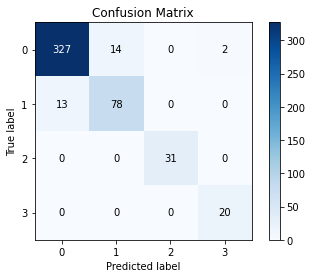

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test_data, sft_prediction)

#plt.show()
plt.savefig('Confusion_matrix',dpi=500)
plt.show();


In [ ]:
# predict probabilities
pred_prob1 = clf1.predict_proba(X_test_data)
pred_prob2 = clf3.predict_proba(X_test_data)
pred_prob3= clf4.predict_proba(X_test_data)
pred_prob4= clf5.predict_proba(X_test_data)
pred_prob5= clf7.predict_proba(X_test_data)
pred_prob6= eclf_WVE.predict_proba(X_test_data)

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test_data, classes=[0,1, 2, 3])
n_classes = y_test_bin.shape[1]

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_bin[:, 1], pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_bin[:, 1], pred_prob2[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test_bin[:, 1], pred_prob3[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test_bin[:, 1], pred_prob4[:, 1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test_bin[:, 1], pred_prob5[:, 1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test_bin[:, 1], pred_prob6[:, 1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_data))]
p_fpr, p_tpr, _ = roc_curve(y_test_data, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_bin[:, 1], pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_bin[:, 1], pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test_bin[:, 1], pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test_bin[:, 1], pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test_bin[:, 1], pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test_bin[:, 1], pred_prob6[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6)

0.9705472192781838 0.8751045908406315 0.9722485636191219 0.9656244770457968 0.9129525297037987 0.9875606626875663


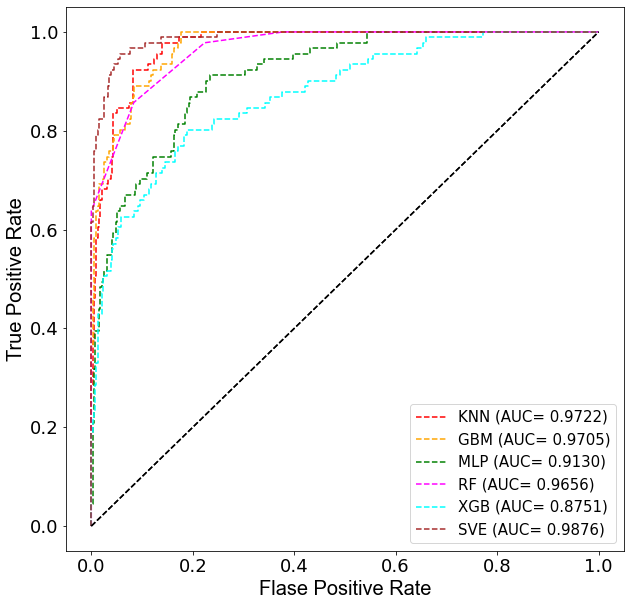

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as pyplot
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20', 'color':'black'}

fig = pyplot.figure(figsize=(10, 10))



# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN (AUC= %0.4f)' % auc_score3)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GBM (AUC= %0.4f)' % auc_score1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='MLP (AUC= %0.4f)' % auc_score5)
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='RF (AUC= %0.4f)' % auc_score4)
plt.plot(fpr2, tpr2, linestyle='--',color='cyan', label='XGB (AUC= %0.4f)' % auc_score2)
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='SVE (AUC= %0.4f)' % auc_score6)
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.plot([0,1], [0,1], color='black', linestyle='--')

# plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", **axis_font)

# plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", **axis_font)

# plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)

pyplot.tick_params(labelsize=18, labelcolor= "black")
pyplot.legend(loc="lower right", prop={"size":15})

# plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# plt.legend(loc='best',)
plt.savefig('ROC',dpi=300)
plt.show();

(485, 4)
(485, 4)


<Figure size 720x720 with 0 Axes>

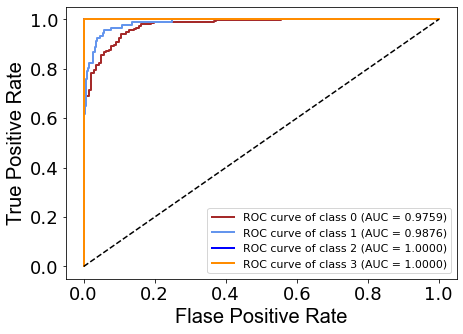

In [ ]:
from itertools import cycle
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
print(y_test_bin.shape)
print(pred_prob6.shape)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_prob6[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), pred_prob6.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20', 'color':'black'}

fig = pyplot.figure(figsize=(10, 10))


lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(7,5))

colors = cycle(['brown','cornflowerblue', 'blue', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.4f})'
             ''.format(i, roc_auc[i]))
    

plt.plot([0,1], [0,1], color='black', linestyle='--')

# plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", **axis_font)

# plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", **axis_font)

# plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)

pyplot.tick_params(labelsize=18, labelcolor= "black")
pyplot.legend(loc="lower right", prop={"size":11})

# plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC_classes',dpi=500)
plt.show();